In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mbkinaci/fruit-images-for-object-detection")

print("Path to dataset files:", path)

100%|██████████| 28.4M/28.4M [00:00<00:00, 59.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mbkinaci/fruit-images-for-object-detection/versions/1


In [2]:
# Importing modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [3]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []
train_labels = []
shape = (200,200)
train_path = '/root/.cache/kagglehub/datasets/mbkinaci/fruit-images-for-object-detection/versions/1/train_zip/train'

for filename in os.listdir('/root/.cache/kagglehub/datasets/mbkinaci/fruit-images-for-object-detection/versions/1/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))

        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [4]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '/root/.cache/kagglehub/datasets/mbkinaci/fruit-images-for-object-detection/versions/1/test_zip/test'

for filename in os.listdir('/root/.cache/kagglehub/datasets/mbkinaci/fruit-images-for-object-detection/versions/1/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))

        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape)

        test_images.append(img)

# Converting test_images to array
test_images = np.array(test_images)

[False  True False False]


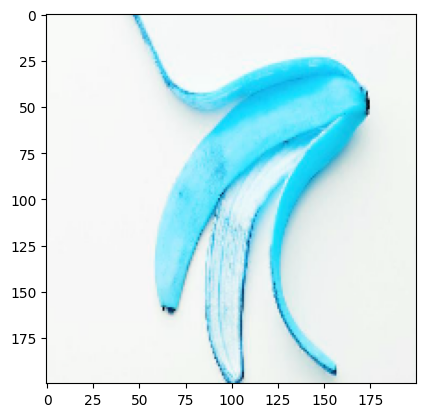

In [5]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[ True False False False]


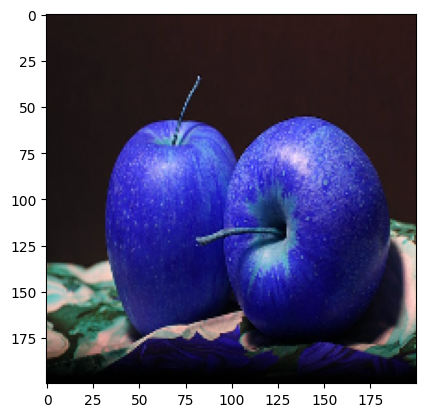

In [6]:
# Visualizing Training data
print(train_labels[4])
plt.imshow(train_images[4])

In [7]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))

model.compile(
              loss='categorical_crossentropy',
              metrics=['acc'],
              optimizer='adam'
             )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 196, 196, 30)        │           8,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 96, 96, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 46, 46, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 63480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │       1,269,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295,825 (4.94 MB)

 Trainable params: 1,295,825 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Training the model
history = model.fit(x_train,y_train,epochs=15,batch_size=64,validation_data=(x_val,y_val))

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - acc: 0.9201 - loss: 0.1642 - val_acc: 0.8333 - val_loss: 1.1870
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 37s 10s/step - acc: 0.9457 - loss: 0.1375 - val_acc: 0.8333 - val_loss: 1.1225
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - acc: 0.9727 - loss: 0.0892 - val_acc: 0.8000 - val_loss: 1.2668
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.9755 - loss: 0.0886 - val_acc: 0.8333 - val_loss: 1.2289
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.9780 - loss: 0.0739 - val_acc: 0.8167 - val_loss: 1.1969
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 42s 10s/step - acc: 0.9914 - loss: 0.0671 - val_acc: 0.8333 - val_loss: 1.1465
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 40s 9s/step - acc: 0.9914 - loss: 0.0521 - val_acc: 0.8333 - val_loss: 1.1417
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.9886 - loss: 0.0437 - val_acc: 0.8167 - val_loss: 1.2296
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - acc: 0.9972 - loss: 0.0398 - val_ac

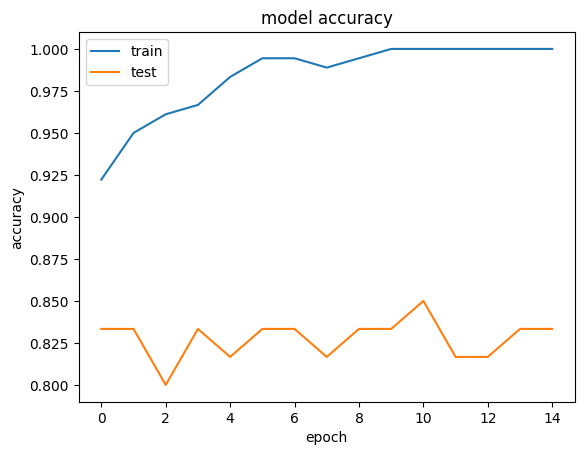

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

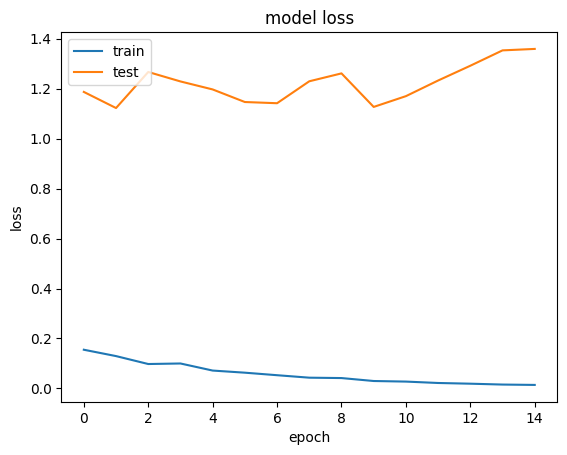

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - acc: 0.8160 - loss: 1.6255
[1.3591182231903076, 0.8333333134651184]


In [15]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Actual :-  ['apple']
Predicted :-  apple
